# KNN

In [1]:
import numpy as np

cfile = np.loadtxt('../dataset/coughvid_20211012/covid.txt')
print(cfile.shape)
hfile = np.loadtxt('../dataset/coughvid_20211012/healthy.txt')
print(hfile.shape)

(1000, 22050)
(1000, 22050)


In [6]:
from sklearn.model_selection import train_test_split

data = np.vstack((cfile, hfile))
labels = np.full(len(data), fill_value='healthy')
labels[:len(cfile)] = 'covid'
print(data.shape)

ffts = []
for i in range(len(data)):
    fft = np.fft.fft(data[i])
    ffts.append(abs(fft[:len(fft)//2]))
ffts = np.array(ffts)
print(ffts.shape)

xtrain, xtest, ytrain, ytest = train_test_split(ffts, labels, test_size=0.2, random_state=42)

(2000, 22050)
(2000, 11025)


In [7]:
from sklearn.neighbors import KNeighborsClassifier

ns = np.arange(1, 11)
accs = []

for i in ns:
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(xtrain, ytrain)

    acc = 0
    pred = neigh.predict(xtest)

    for j in range(len(pred)):
        if pred[j] == ytest[j]:
            acc += 1

    accs.append(acc/len(pred))

    print('KNN accuracy at neighbors = ', i, ': ', accs[-1])

KNN accuracy at neighbors =  1 :  0.515
KNN accuracy at neighbors =  2 :  0.5125
KNN accuracy at neighbors =  3 :  0.55
KNN accuracy at neighbors =  4 :  0.5375
KNN accuracy at neighbors =  5 :  0.51
KNN accuracy at neighbors =  6 :  0.5475
KNN accuracy at neighbors =  7 :  0.525
KNN accuracy at neighbors =  8 :  0.535
KNN accuracy at neighbors =  9 :  0.4925
KNN accuracy at neighbors =  10 :  0.5125


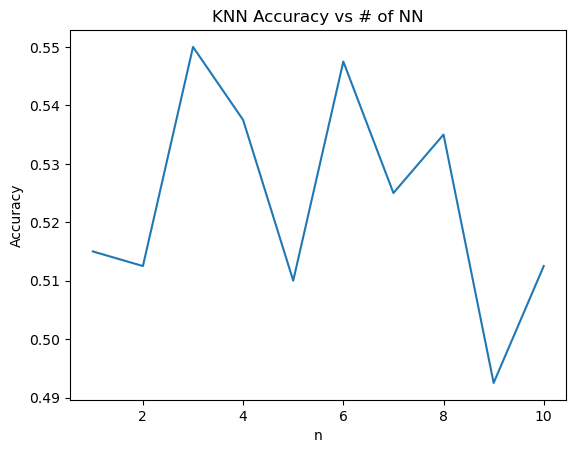

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(ns, accs)
plt.xlabel('n')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs # of NN')
plt.show()

# SVM

In [9]:
from sklearn.svm import SVC
from copy import deepcopy

Cs = [0.01, 0.1, 1, 5, 10]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
info = dict()

for c in Cs:
    accs = []

    for k in kernels:
        svm = SVC(C=c, kernel=k)
        svm.fit(xtrain, ytrain)

        acc = 0
        pred = svm.predict(xtest)

        for j in range(len(pred)):
            if pred[j] == ytest[j]:
                acc += 1

        accs.append(acc/len(pred))
        print('Finished C=', c, ', kernel=', k,', with accuracy: ', accs[-1])

    label = 'C=%f' % c
    info[label] = deepcopy(accs)

Finished C= 0.01 , kernel= linear , with accuracy:  0.5375
Finished C= 0.01 , kernel= poly , with accuracy:  0.5125
Finished C= 0.01 , kernel= rbf , with accuracy:  0.4975
Finished C= 0.01 , kernel= sigmoid , with accuracy:  0.4975
Finished C= 0.1 , kernel= linear , with accuracy:  0.5375
Finished C= 0.1 , kernel= poly , with accuracy:  0.515
Finished C= 0.1 , kernel= rbf , with accuracy:  0.4875
Finished C= 0.1 , kernel= sigmoid , with accuracy:  0.5
Finished C= 1 , kernel= linear , with accuracy:  0.5375
Finished C= 1 , kernel= poly , with accuracy:  0.555
Finished C= 1 , kernel= rbf , with accuracy:  0.5575
Finished C= 1 , kernel= sigmoid , with accuracy:  0.4775
Finished C= 5 , kernel= linear , with accuracy:  0.5375
Finished C= 5 , kernel= poly , with accuracy:  0.565
Finished C= 5 , kernel= rbf , with accuracy:  0.58
Finished C= 5 , kernel= sigmoid , with accuracy:  0.46
Finished C= 10 , kernel= linear , with accuracy:  0.5375
Finished C= 10 , kernel= poly , with accuracy:  0.557

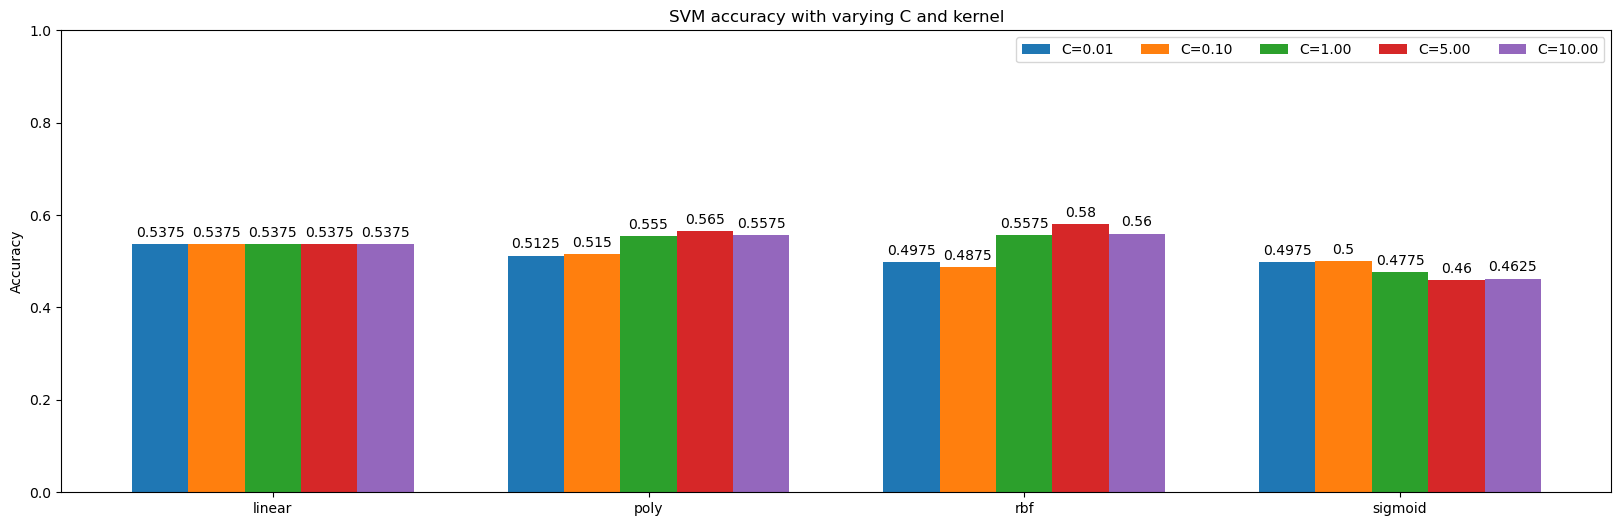

In [10]:
x = np.arange(len(kernels))
width = 0.15
multiplier = 0

fig, ax = plt.subplots(figsize=(20,6))#, layout='tight')

for key, value in info.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, value, width, label=key[:-4])
    ax.bar_label(rects, padding=3)
    multiplier += 1

ax.set_ylabel('Accuracy')
ax.set_title('SVM accuracy with varying C and kernel')
ax.set_xticks(x + 2*width, kernels)
ax.legend(loc='upper right', ncols=5)
ax.set_ylim(0, 1)

plt.show()

# ML

https://colab.research.google.com/drive/1Eb5luA6DQx1sv5XLo1fjS-vvehm9nWQE?usp=sharing

Accuracy after 20 epochs (lr = 1e-5, Adam, MSELoss) = 0.6

Had to reduce learning rate, so that training could converge.

# Highest Accuracies
KNN: 55% at k=1

SVM: 58% at C=5, rbf kernel

ML: 60%